In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [2]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

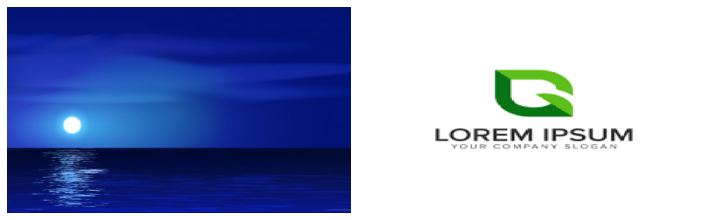

In [3]:
img = cv.imread("img/night-scenery-ocean-with-moon_104785-124.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("img/download.png")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 300)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

show_img_compar(img, img_2)

### Method 1 - Using the Average

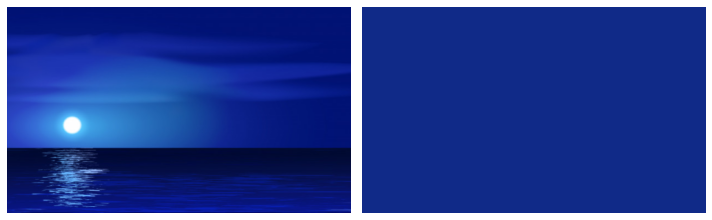

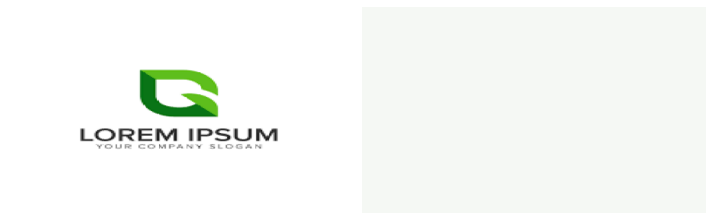

In [4]:
img_temp = img.copy()
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = np.average(img, axis=(0,1))

img_temp_2 = img_2.copy()
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = np.average(img_2, axis=(0,1))

show_img_compar(img, img_temp)
show_img_compar(img_2, img_temp_2)

### Method 2 - Most common combination

In [77]:
print(img.reshape(-1, 3).shape)
img.reshape(-1, 3)

(150000, 3)


array([[  0,  18, 116],
       [  0,  18, 116],
       [  0,  18, 116],
       ...,
       [  6,   7,  98],
       [  3,   9,  95],
       [  1,  11,  93]], dtype=uint8)

In [76]:
print(img.shape)
img

(300, 500, 3)


array([[[  0,  18, 116],
        [  0,  18, 116],
        [  0,  18, 116],
        ...,
        [  0,  18, 116],
        [  1,  19, 117],
        [  1,  19, 117]],

       [[  1,  19, 117],
        [  1,  19, 117],
        [  1,  19, 117],
        ...,
        [  1,  19, 117],
        [  1,  19, 117],
        [  1,  19, 117]],

       [[  1,  19, 117],
        [  1,  19, 117],
        [  1,  19, 117],
        ...,
        [  1,  19, 117],
        [  1,  19, 117],
        [  0,  18, 116]],

       ...,

       [[  9,  22, 135],
        [  9,  22, 135],
        [  9,  22, 137],
        ...,
        [ 11,  28, 141],
        [ 15,  32, 143],
        [ 18,  35, 144]],

       [[ 18,  31, 146],
        [ 18,  31, 146],
        [ 17,  31, 144],
        ...,
        [  9,  23, 136],
        [  9,  22, 138],
        [  9,  22, 139]],

       [[  6,  22, 129],
        [  7,  23, 130],
        [  7,  24, 131],
        ...,
        [  6,   7,  98],
        [  3,   9,  95],
        [  1,  11,  93]]

In [5]:
unique, counts = np.unique(img.reshape(-1, 3), axis=0, return_counts=True)
print(unique)
print(counts)

[[  0   6  51]
 [  0   6  55]
 [  0   6  57]
 ...
 [255 255 253]
 [255 255 254]
 [255 255 255]]
[ 1  1  1 ...  4  7 93]


In [6]:
np.argmax(counts), np.max(counts), np.sum(counts)

(276, 9095, 150000)

In [7]:
unique[np.argmax(counts)]

array([  1,  19, 117], dtype=uint8)

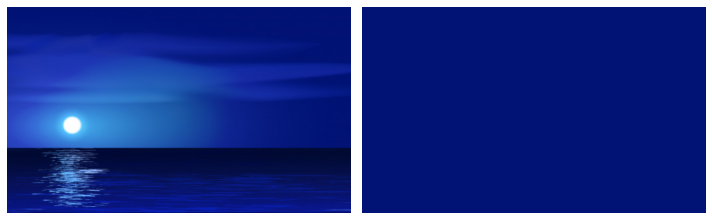

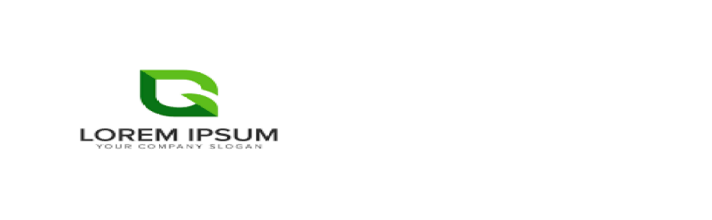

In [8]:
img_temp = img.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]

img_temp_2 = img_2.copy()
unique, counts = np.unique(img_temp_2.reshape(-1, 3), axis=0, return_counts=True)
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = unique[np.argmax(counts)]

show_img_compar(img, img_temp)
show_img_compar(img_2, img_temp_2)

### Method 3 - N  most common color

In [9]:
from sklearn.cluster import KMeanseans

In [10]:
clt = KMeans(n_clusters=5)
clt.fit(img.reshape(-1, 3))

KMeans(n_clusters=5)

In [12]:
clt.labels_

array([2, 2, 2, ..., 2, 0, 0], dtype=int32)

In [32]:
clt.cluster_centers_

array([[  9.01259328, 115.80643657,  20.46408582],
       [254.75573225, 254.78063851, 254.74943331],
       [165.9182536 , 175.33348816, 162.52902926],
       [ 94.52936097, 188.54835924,  31.33765112],
       [ 56.81193694,  56.81193694,  56.81193694]])

In [78]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

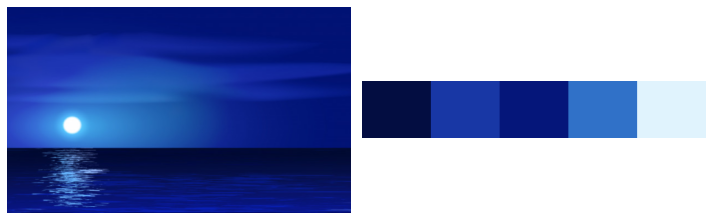

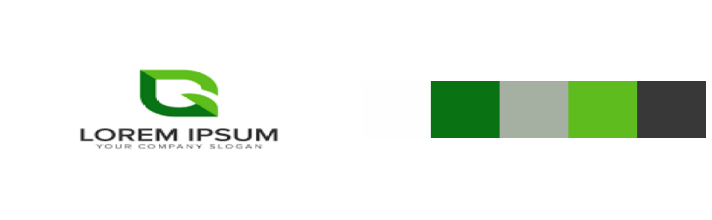

In [79]:
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_2))

K-means with K=5 for the second image seems to be too much. Trying only three gives better results.

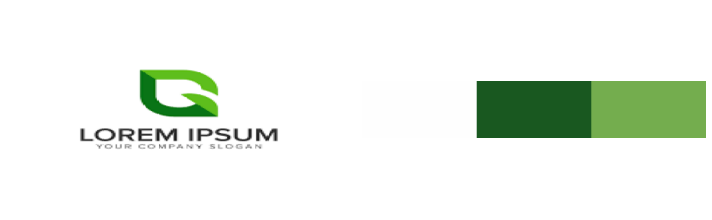

In [81]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

clt_3 = KMeans(n_clusters=3)
clt_3.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_3))

### Method 3.1 - N  most common color plus %

In [71]:
from collections import Counter

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette

{0: 0.23, 1: 0.48, 2: 0.0, 3: 0.14, 4: 0.14}
[[ 24.5368039   55.07417489 165.66686515]
 [  5.33548405  22.68171235 122.65880719]
 [224.52341137 243.03177258 253.41973244]
 [ 48.71934016 113.23751321 200.94862841]
 [  3.41775395  13.12027328  65.11875504]]


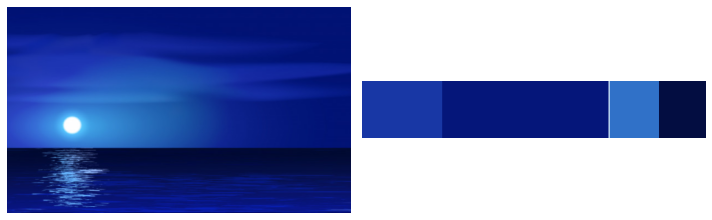

{0: 0.94, 1: 0.01, 2: 0.02, 3: 0.01, 4: 0.01}
[[254.75573225 254.78063851 254.74943331]
 [  9.01259328 115.80643657  20.46408582]
 [ 94.52936097 188.54835924  31.33765112]
 [165.9182536  175.33348816 162.52902926]
 [ 56.81193694  56.81193694  56.81193694]]


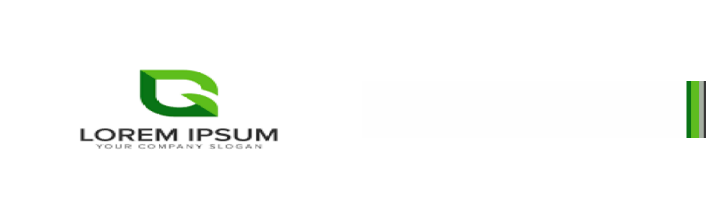

In [73]:
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette_perc(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette_perc(clt_2))

### What if we used k=1 for the second image

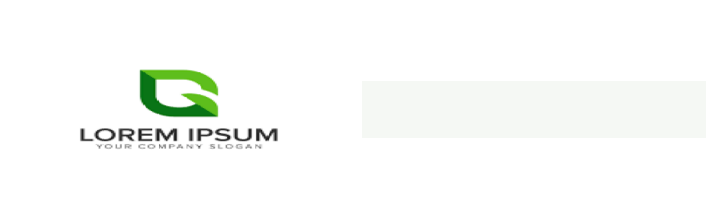

In [82]:
clt_1 = KMeans(n_clusters=1)
clt_1.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_1))

Answer: We'll get the same results as the average method